In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "NanumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [11]:
df = pd.read_csv("../OUT/total_20.csv")

In [12]:
df

lot_id    tray_id  rta1_tat  hta1_tat  rta2_tat  ocv1_tat  c1_tat  \
0      LOT-100  TRAY-1002    217709     86476      4524       118    3580   
1      LOT-100  TRAY-1002    217709     86476      4524       118    3580   
2      LOT-100  TRAY-1002    217709     86476      4524       118    3580   
3      LOT-100  TRAY-1002    217709     86476      4524       118    3580   
4      LOT-100  TRAY-1002    217709     86476      4524       118    3580   
...        ...        ...       ...       ...       ...       ...     ...   
31025  LOT-144  TRAY-2791    152836     87334    156490       118    3553   
31026  LOT-144  TRAY-2791    152836     87334    156490       118    3553   
31027  LOT-144  TRAY-2791    152836     87334    156490       118    3553   
31028  LOT-144  TRAY-2791    152836     87334    156490       118    3553   
31029  LOT-144  TRAY-2791    152836     87334    156490       118    3553   

       dc1_tat  c2_tat  dc2_tat  ...  sa3_box_dan  socv3_ocv  ocv2_deltaocv  \
0          405     453      405  ...          10단     3759.6            5.0   
1          405     453      405  ...          10단     3760.4            5.1   
2          405     453      405  ...          10단     3760.4            4.9   
3          405     453      405  ...          10단     3759.0            5.1   
4          405     453      405  ...          10단     3759.0            5.0   
...        ...     ...      ...  ...          ...        ...            ...   
31025      405     451      405  ...          13단     3759.2            5.3   
31026      405     451      405  ...          13단     3759.2            5.3   
31027      405     451      405  ...          13단     3760.3            5.2   
31028      405     451      405  ...          13단     3760.0            5.3   
31029      405     451      405  ...          13단     3760.0            5.3   

       ocv1_deltaocv  m1_thick  m1_voltage  m1_res_ac  m1_mv  m1_voltage_an  \
0                6.8    4709.0     37583.0       92.0  626.0          109.0   
1                6.8    4712.0     37591.0       92.0  606.0            5.0   
2                6.7    4737.0     37594.0       92.0  566.0          -10.0   
3                6.9    4709.0     37578.0       92.0  606.0          111.0   
4                6.7    4706.0     37577.0       93.0  606.0          -38.0   
...              ...       ...         ...        ...    ...            ...   
31025            7.2    4745.0     37583.0       94.0  643.0          -35.0   
31026            7.1    4746.0     37583.0       94.0  620.0           89.0   
31027            7.0    4782.0     37595.0       92.0  597.0          -23.0   
31028            7.0    4751.0     37590.0       95.0  620.0            3.0   
31029            7.1    4792.0     37592.0       94.0  597.0           56.0   

       result  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
31025       0  
31026       0  
31027       0  
31028       0  
31029       1  

[31030 rows x 131 columns]

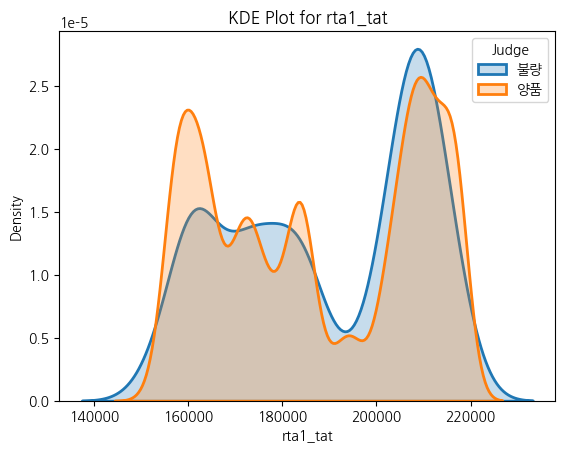

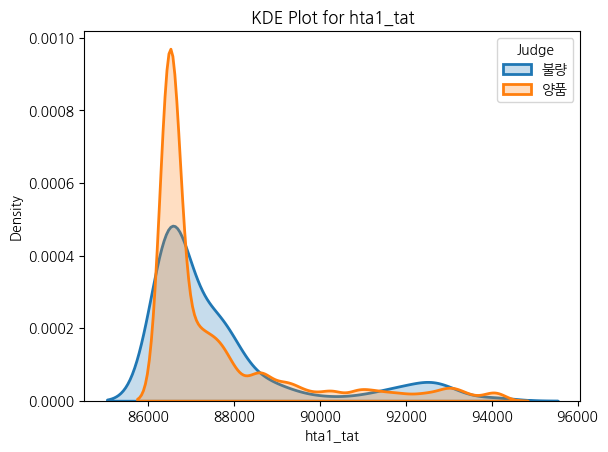

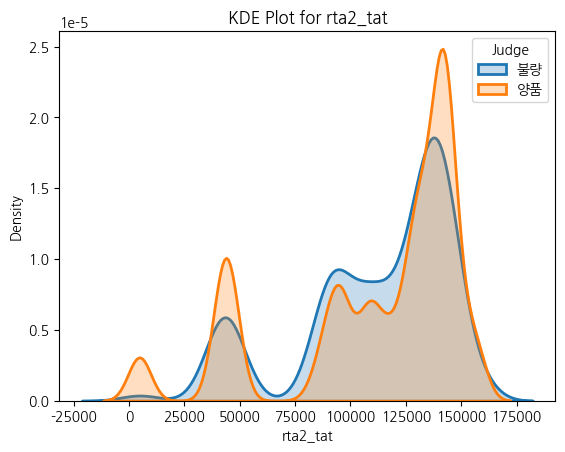

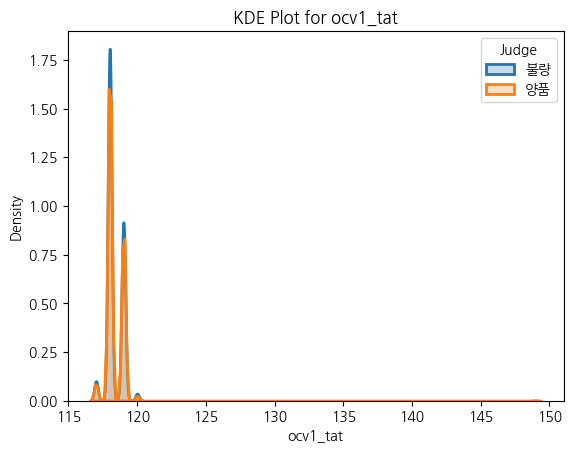

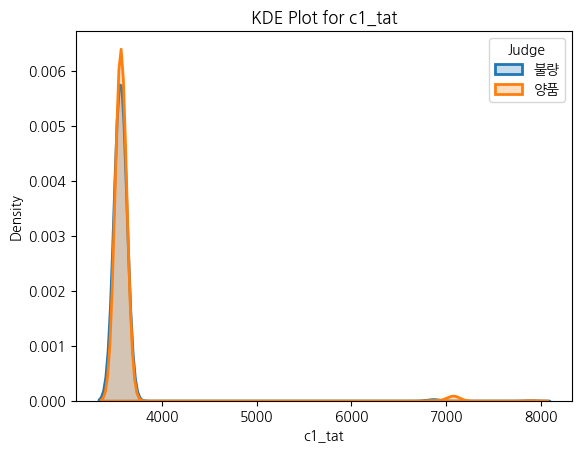

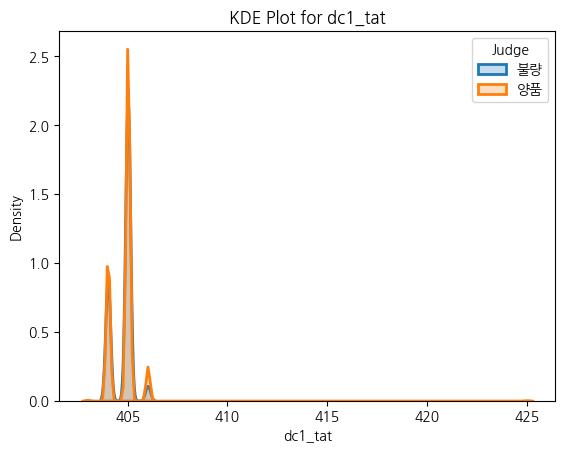

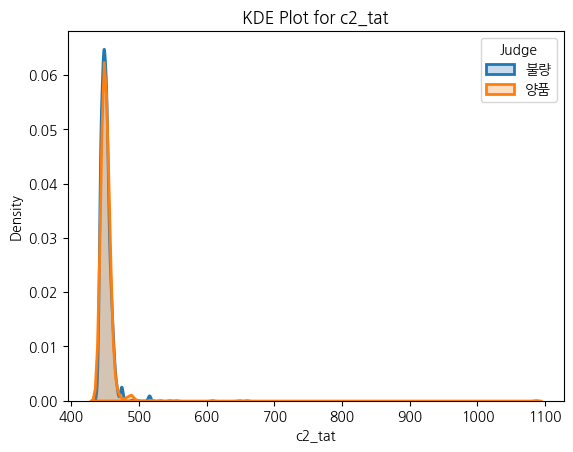

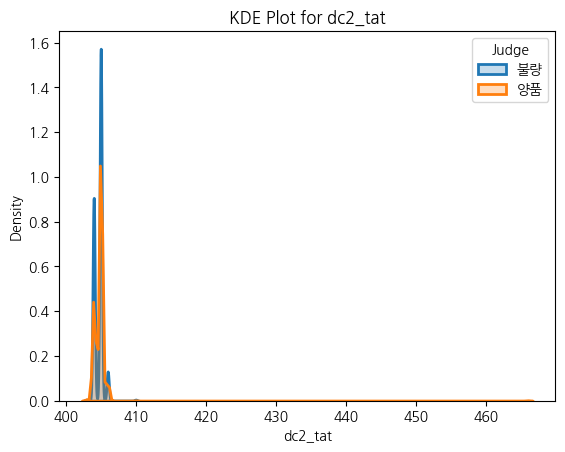

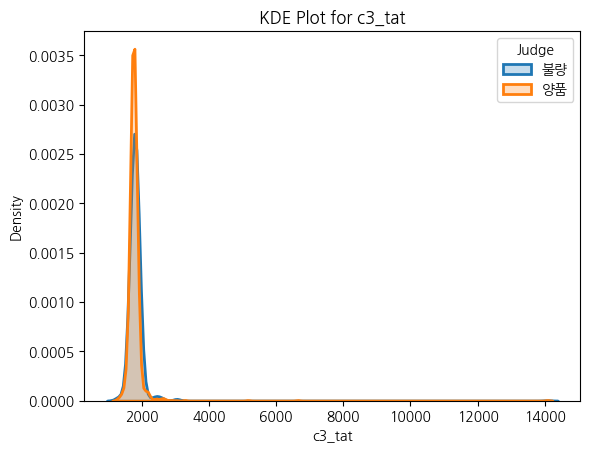

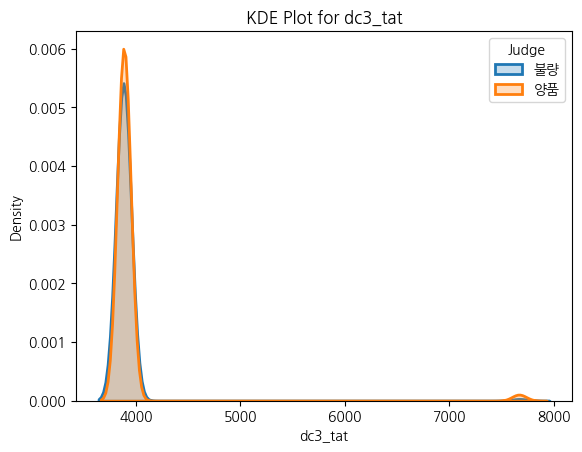

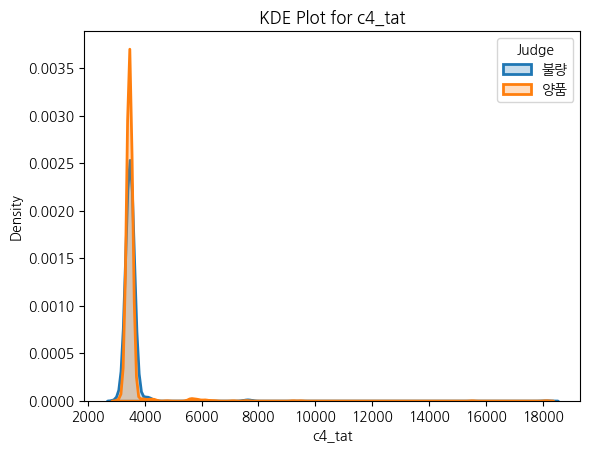

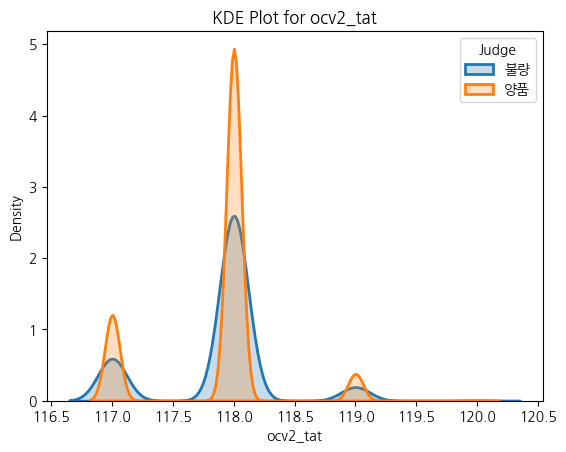

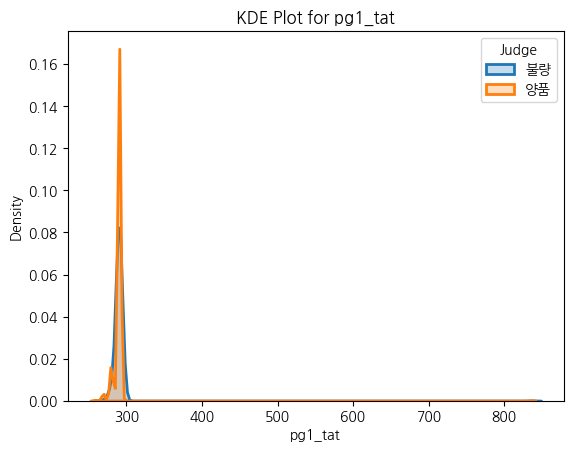

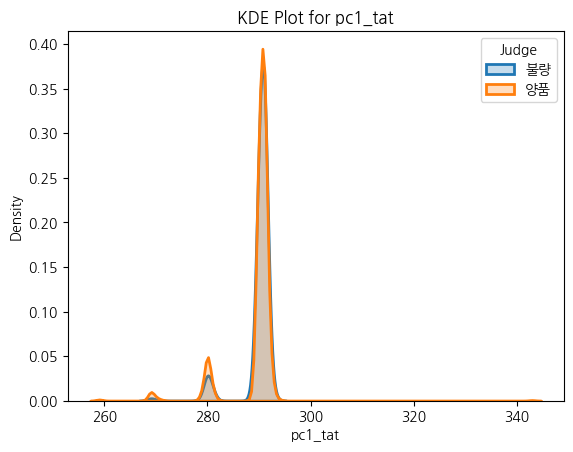

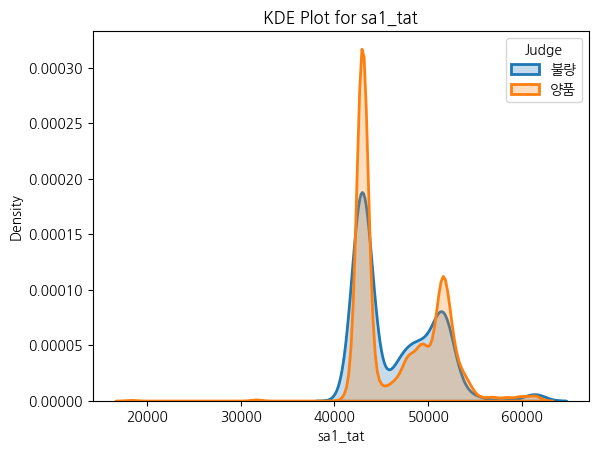

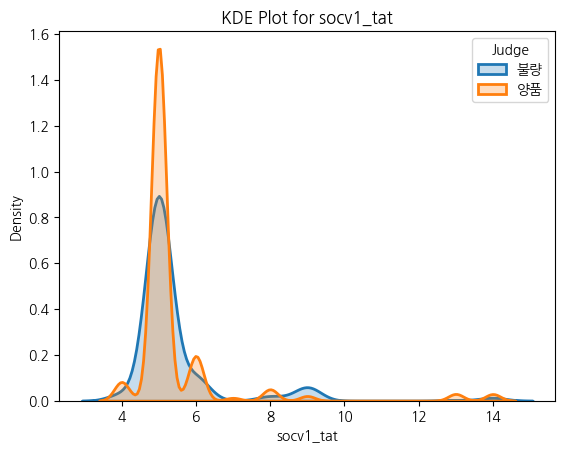

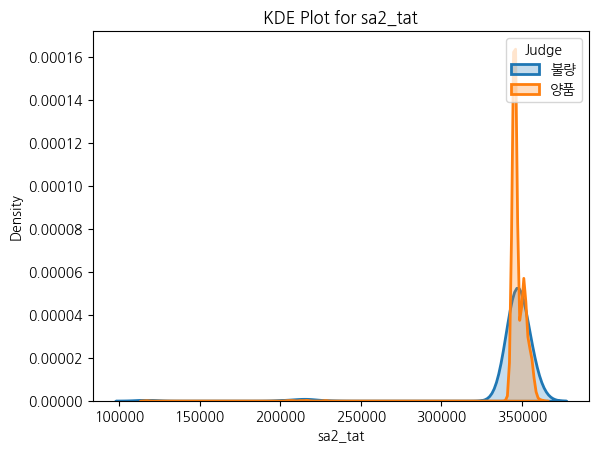

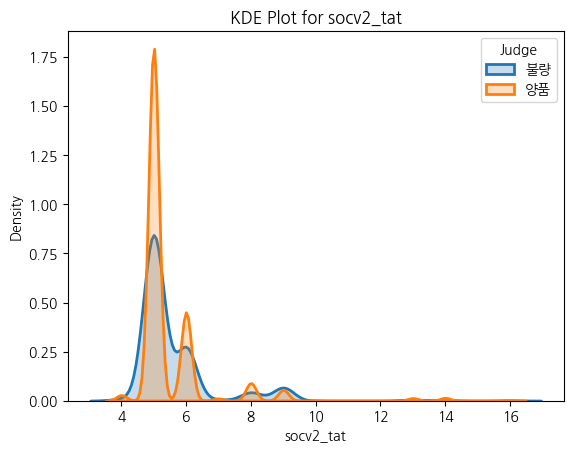

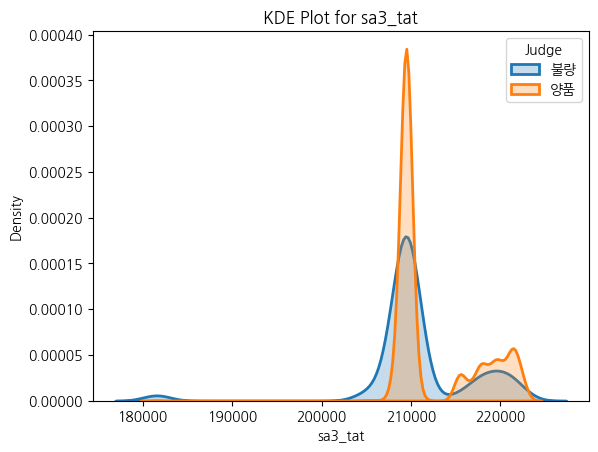

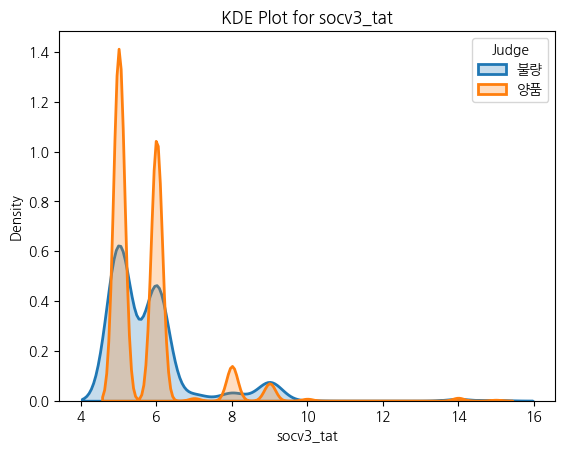

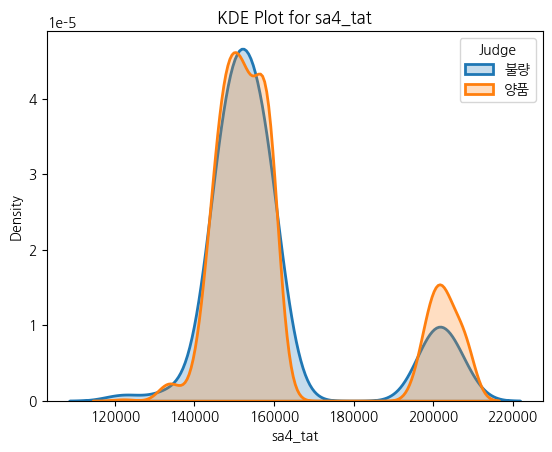

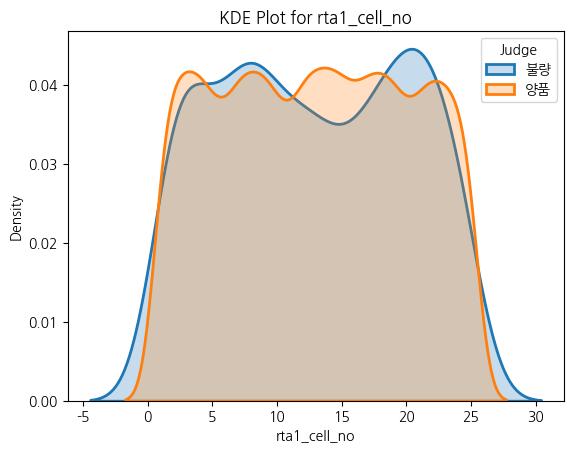

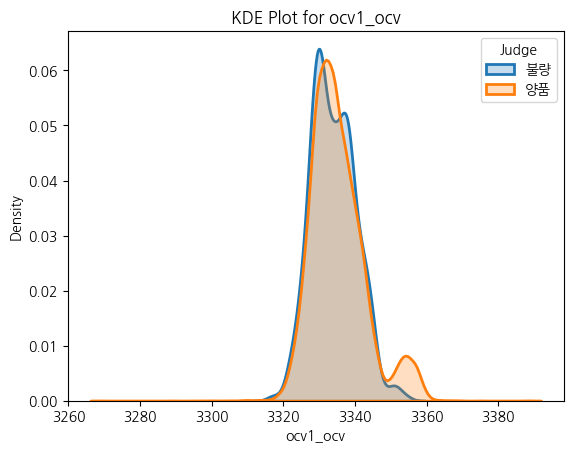

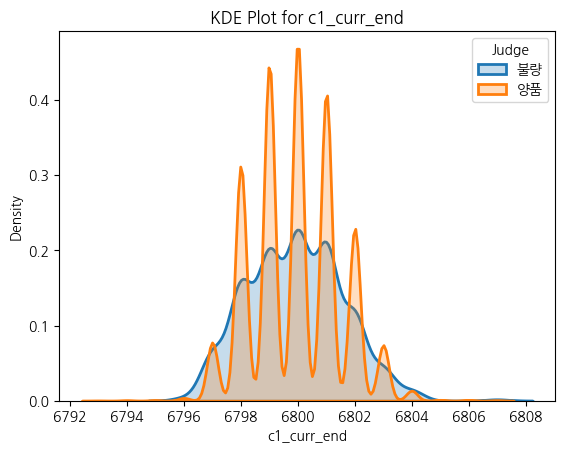

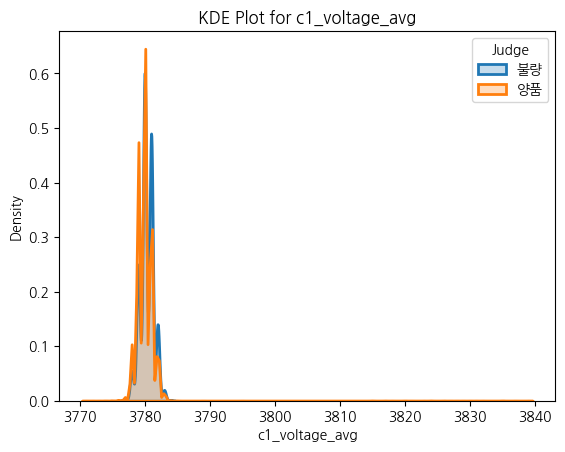

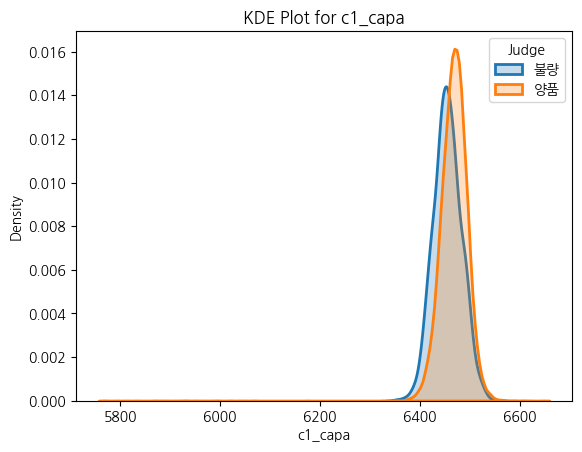

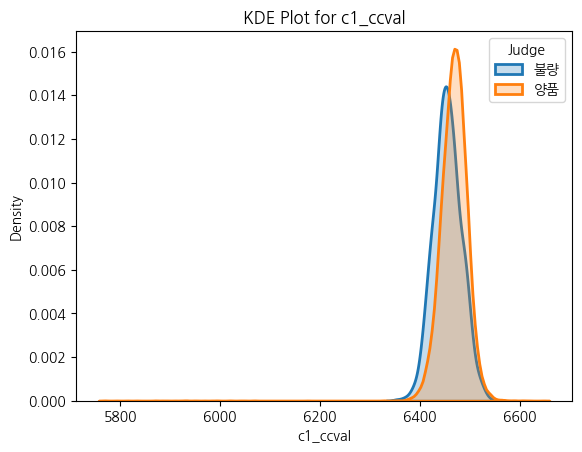

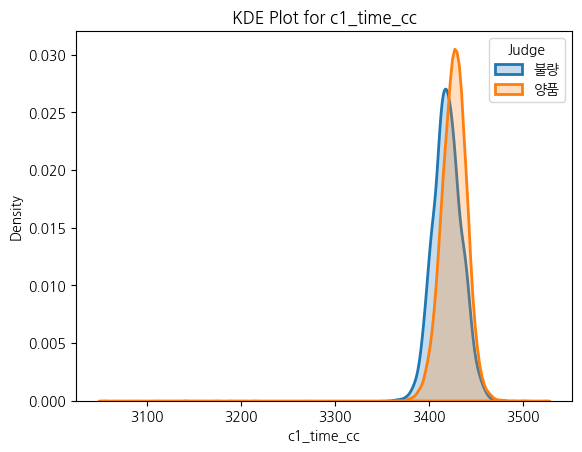

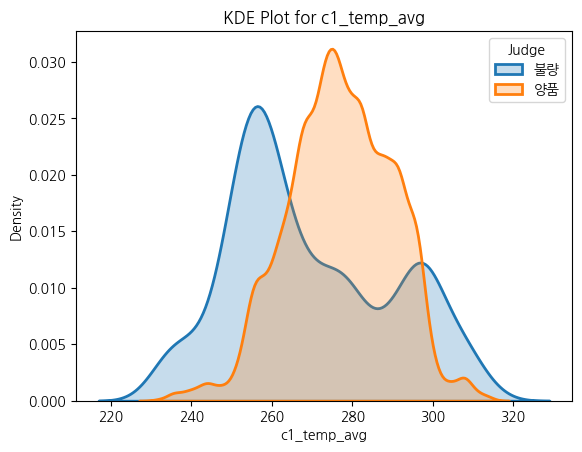

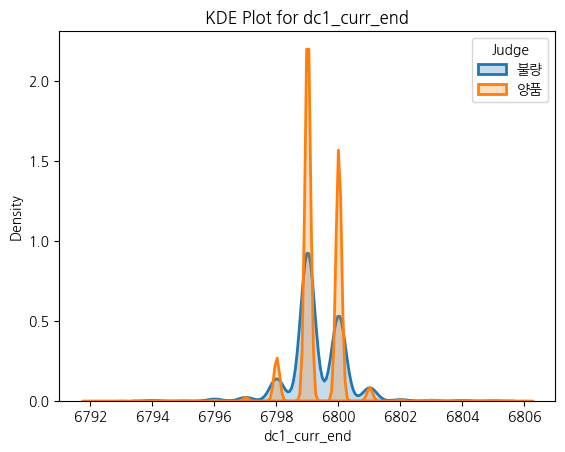

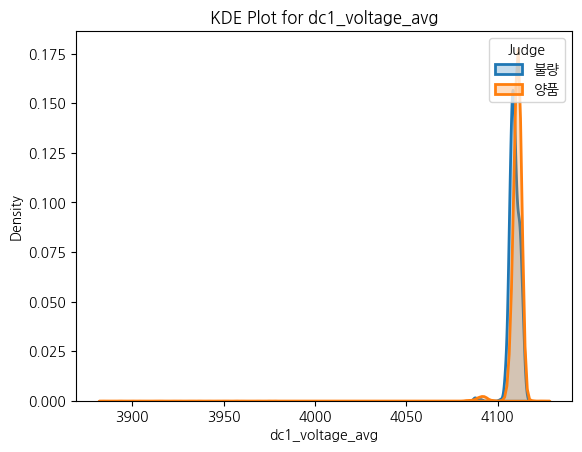

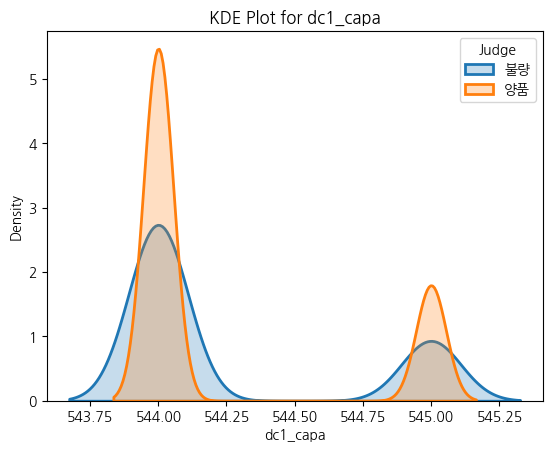

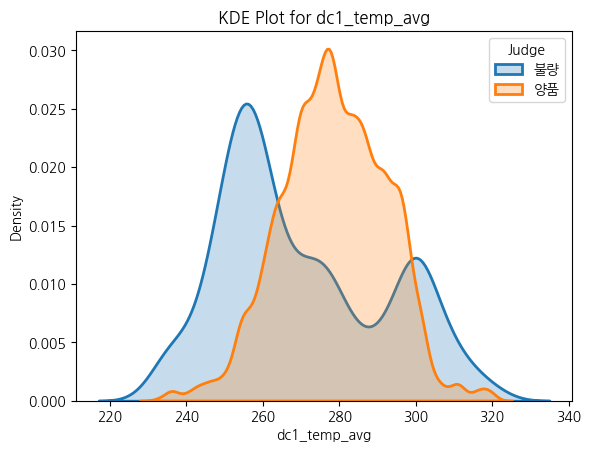

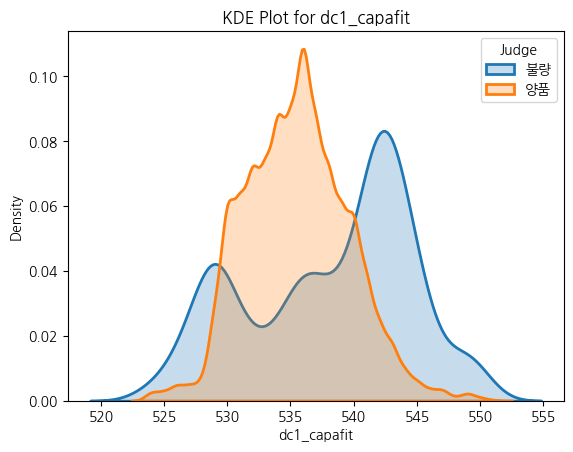

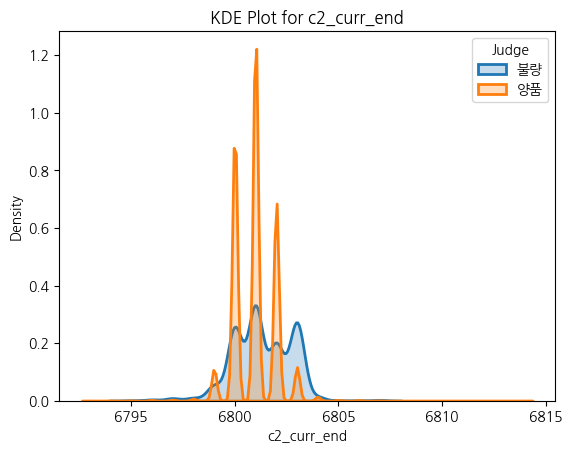

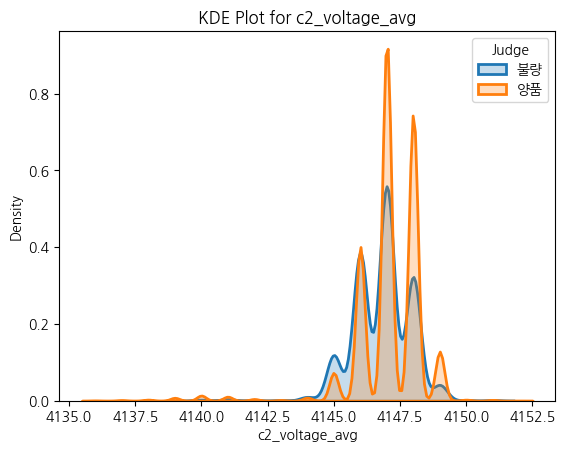

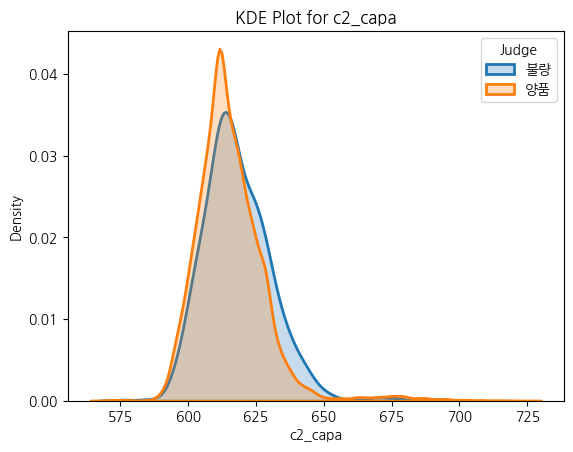

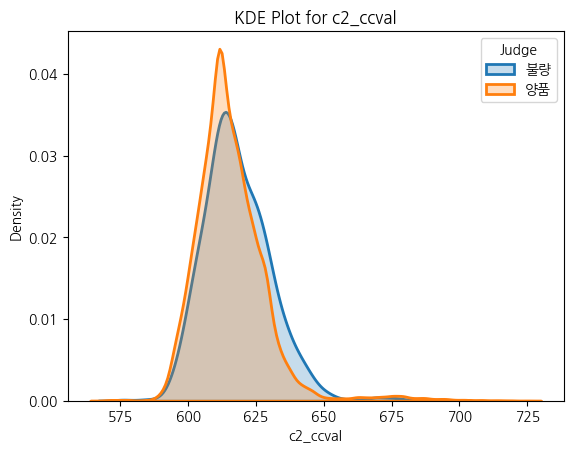

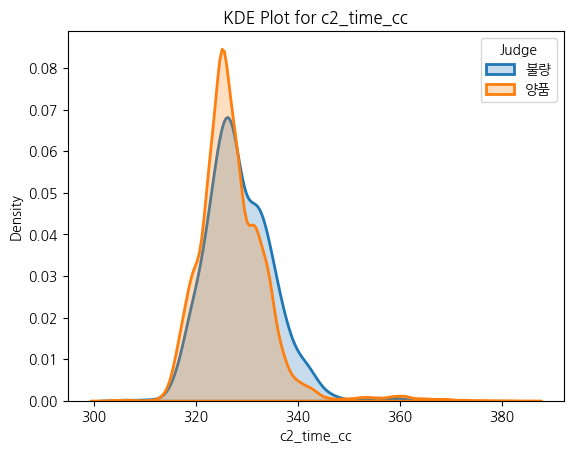

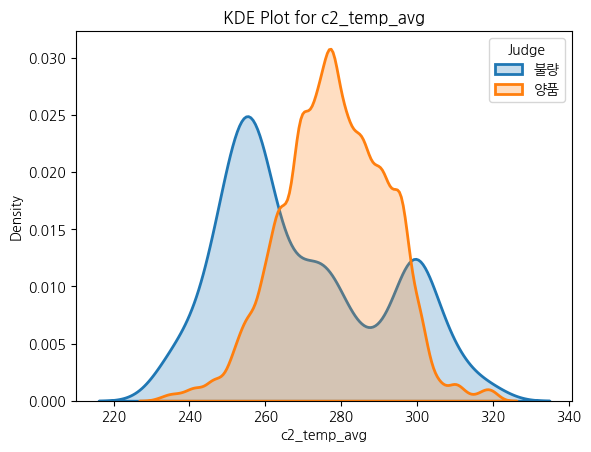

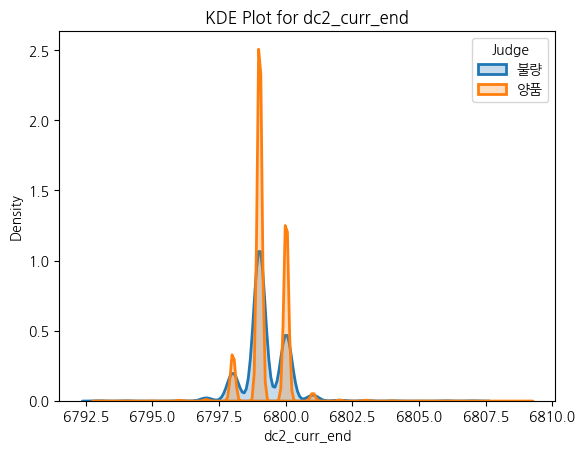

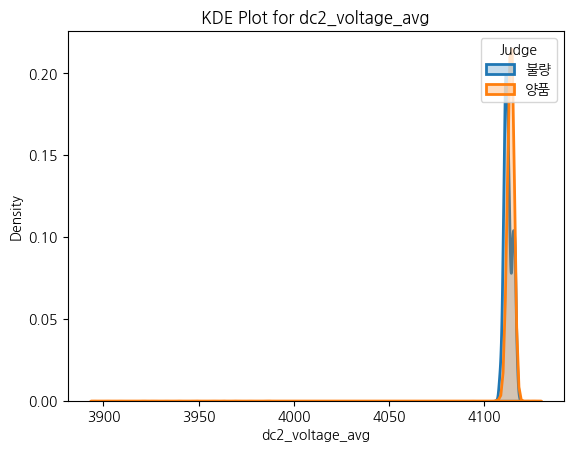

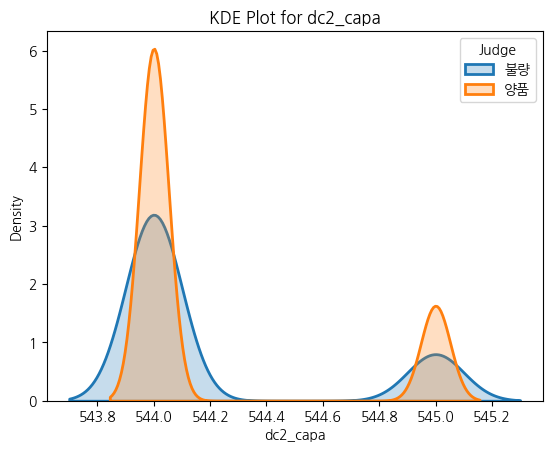

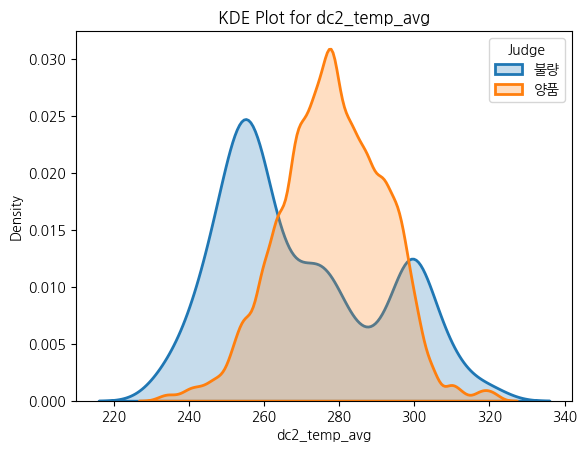

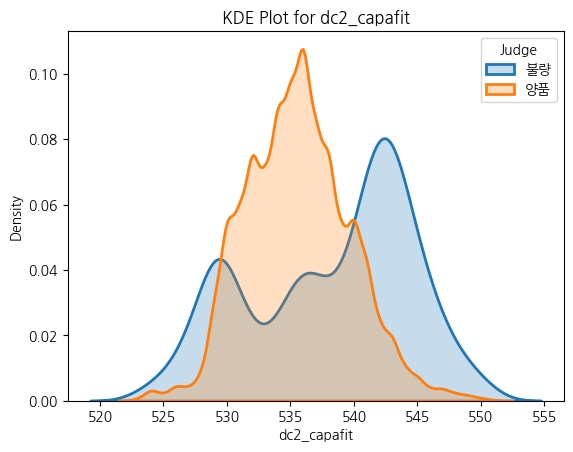

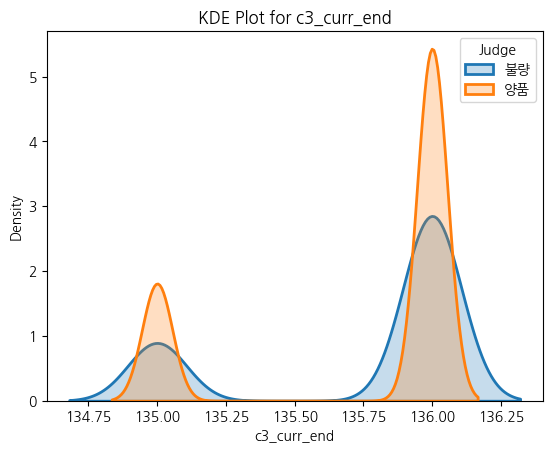

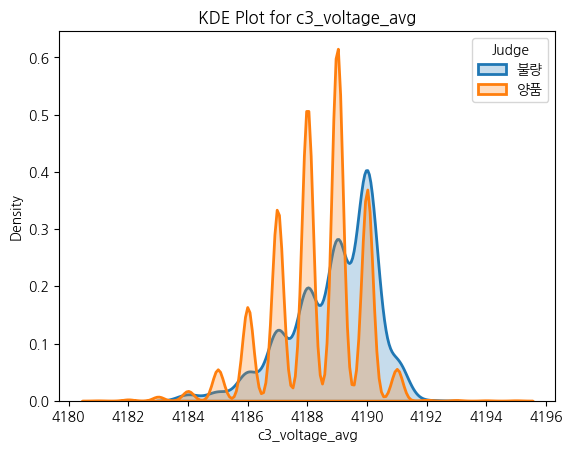

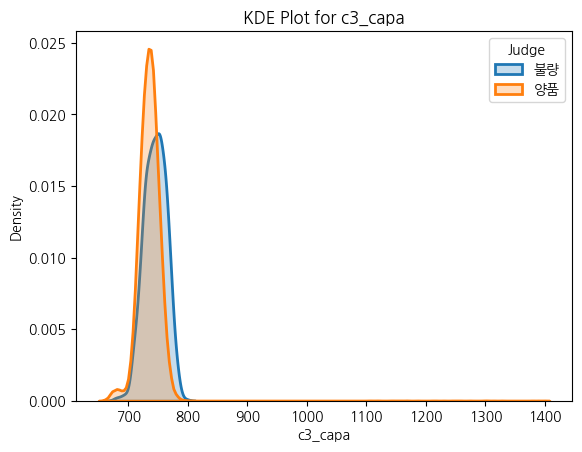

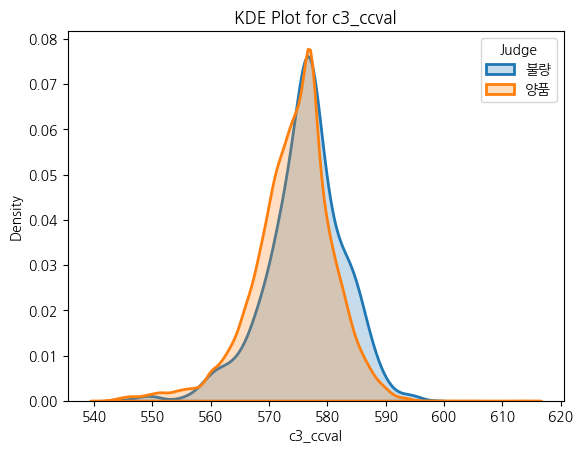

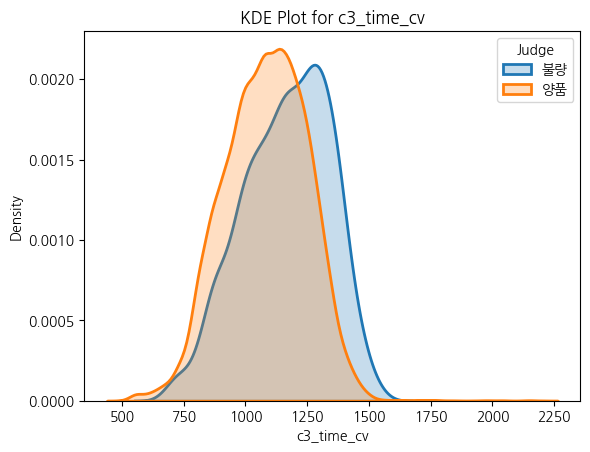

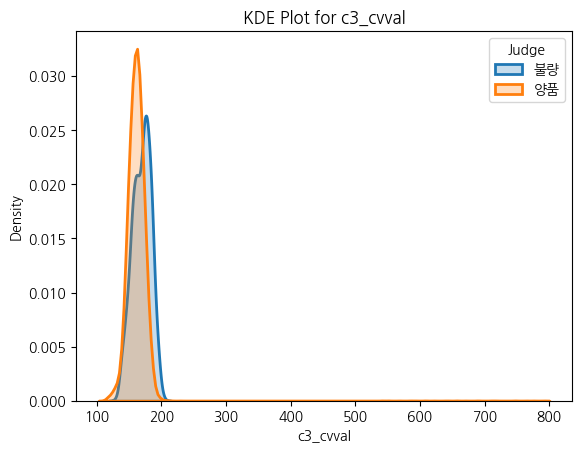

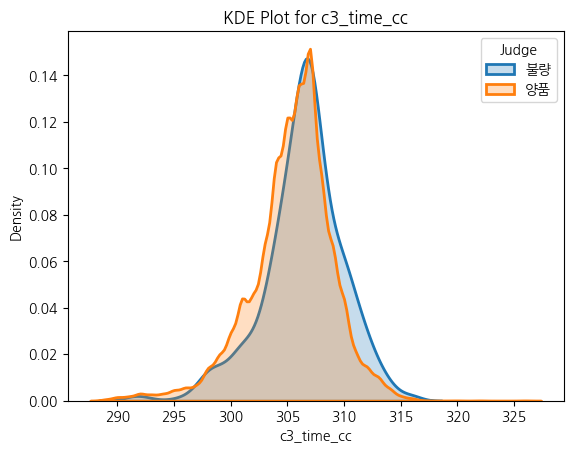

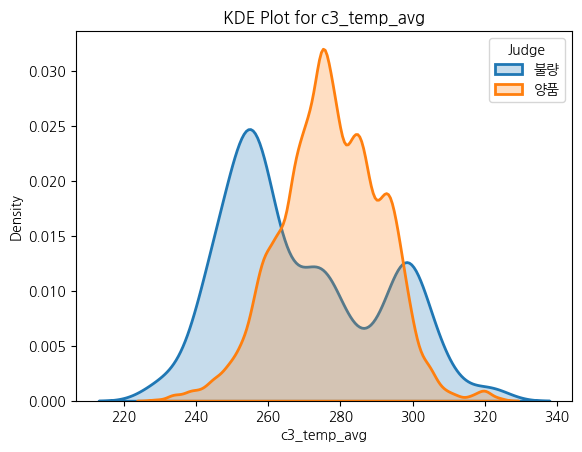

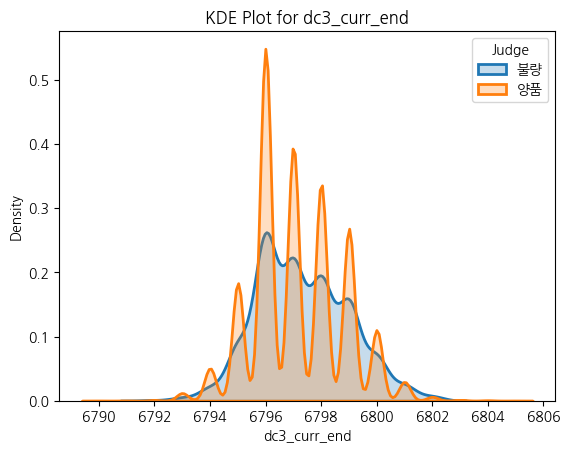

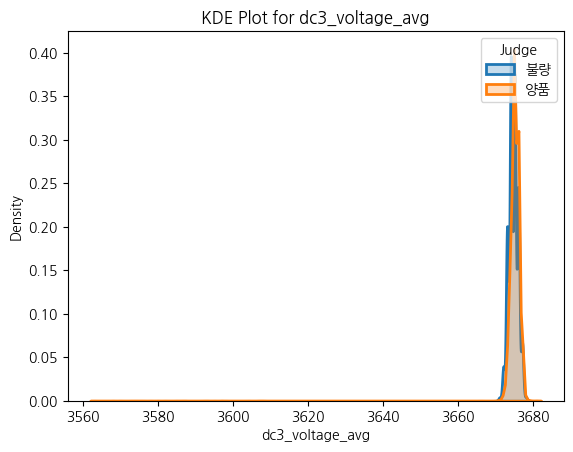

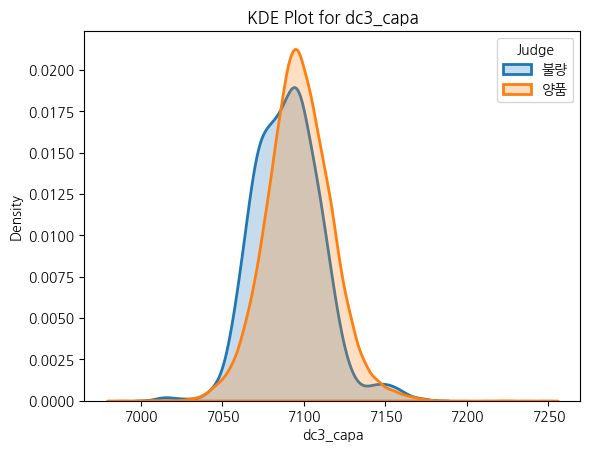

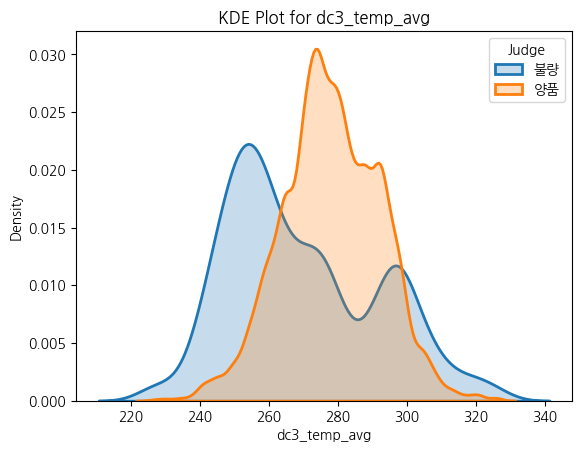

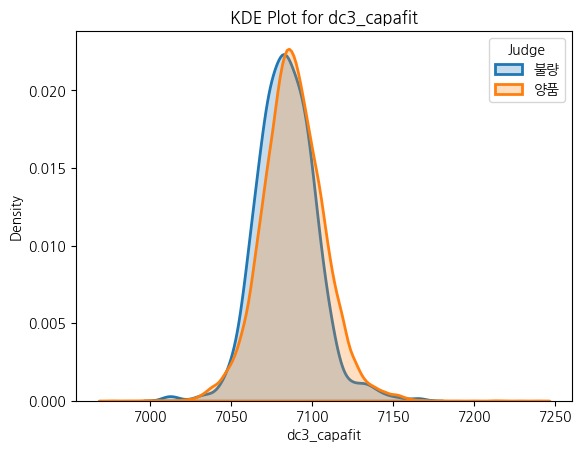

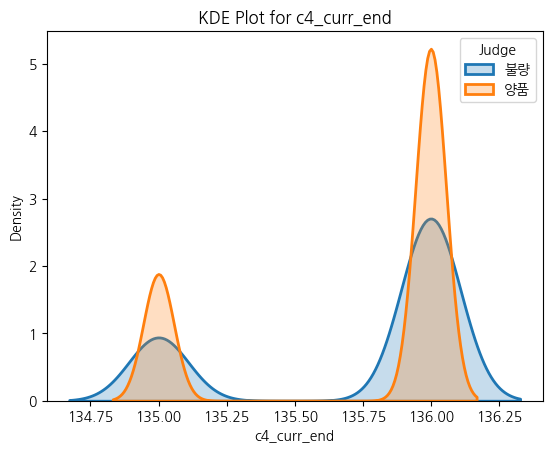

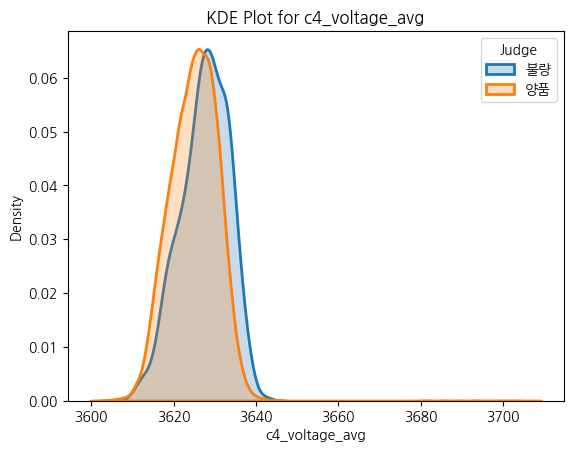

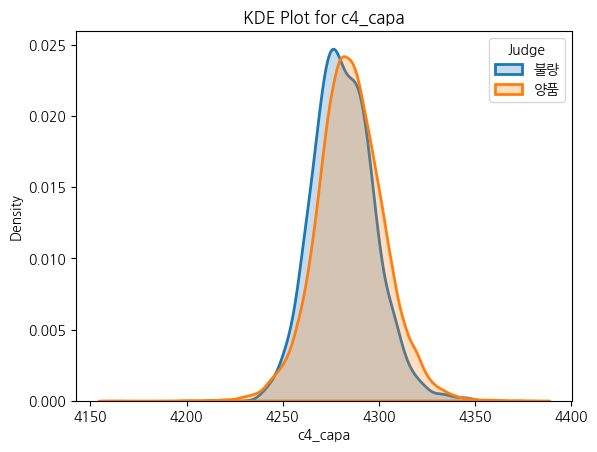

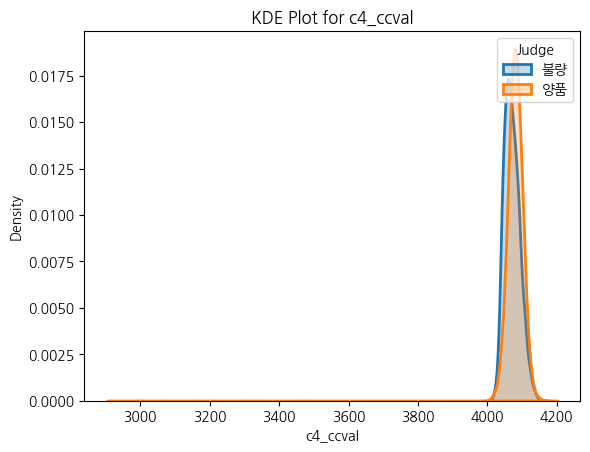

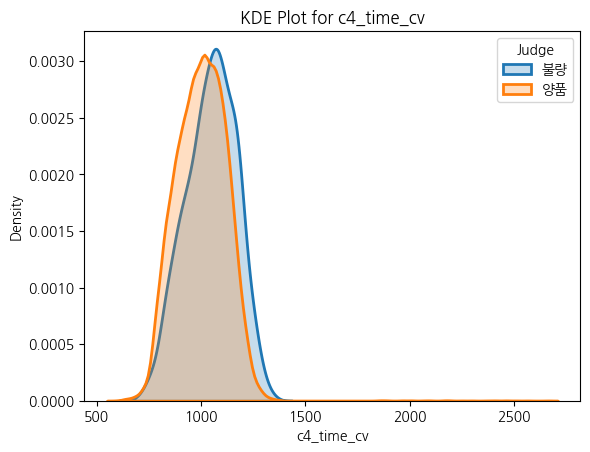

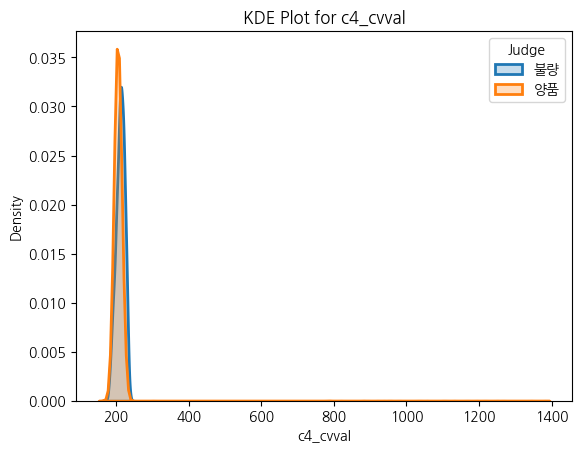

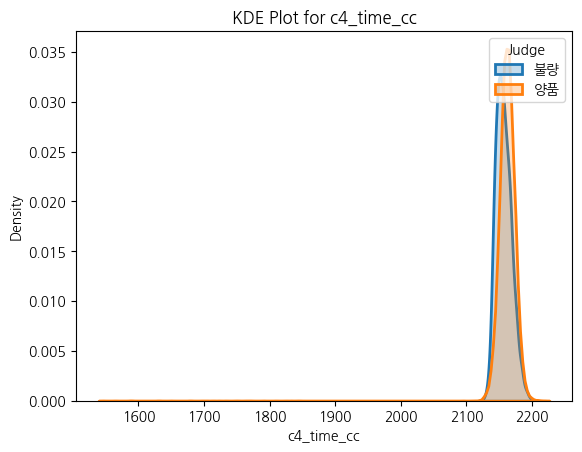

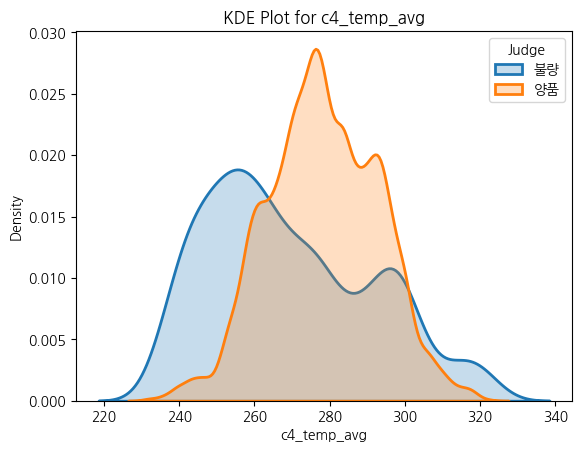

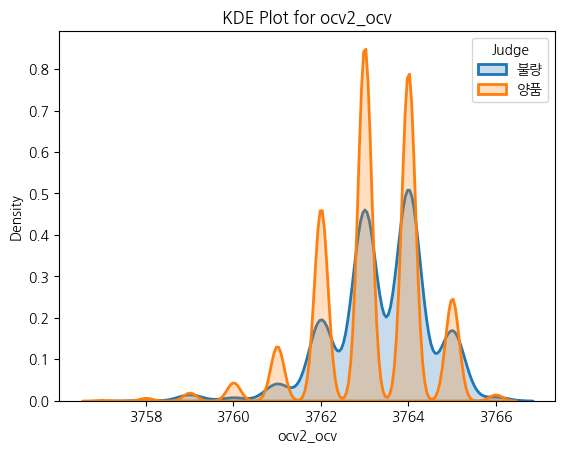

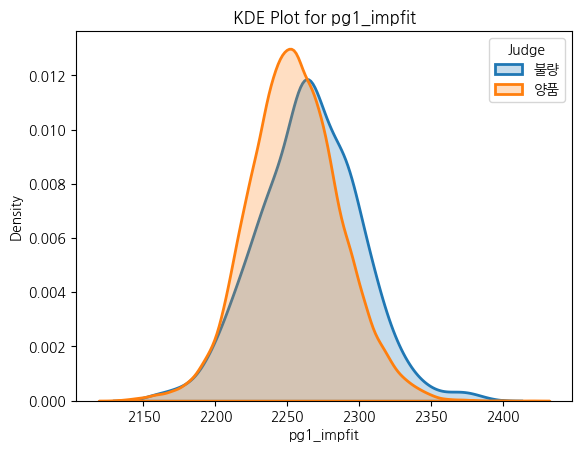

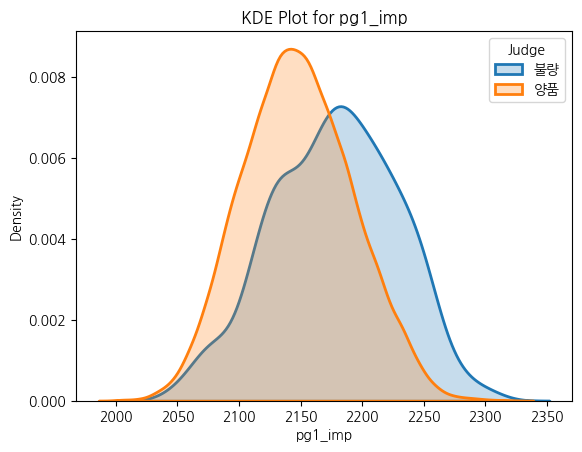

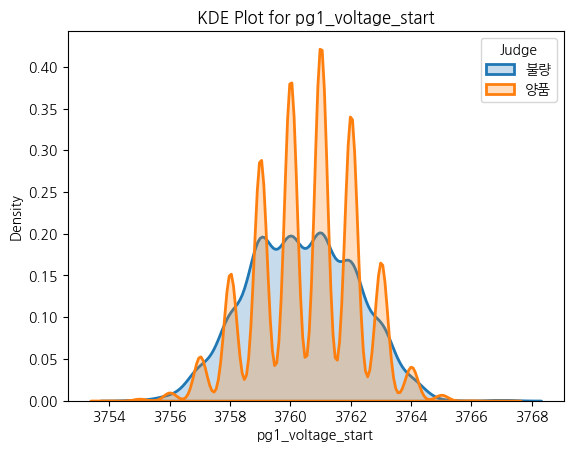

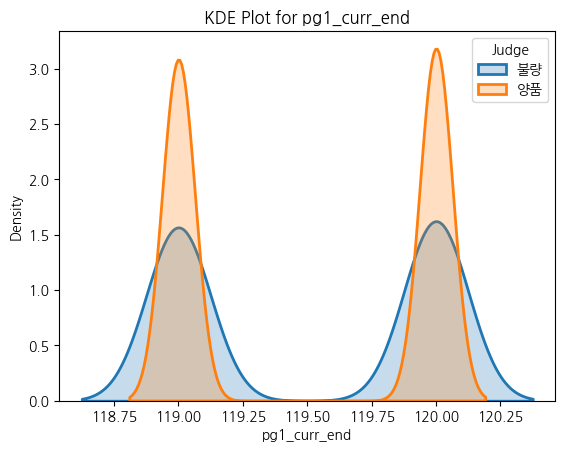

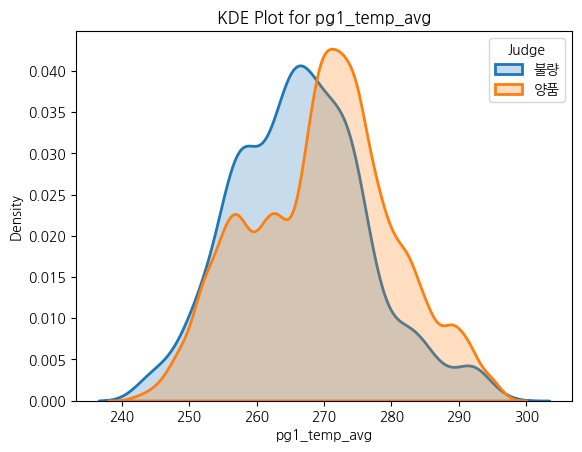

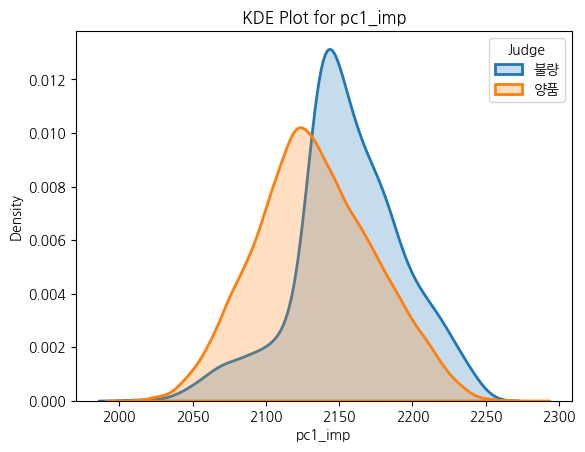

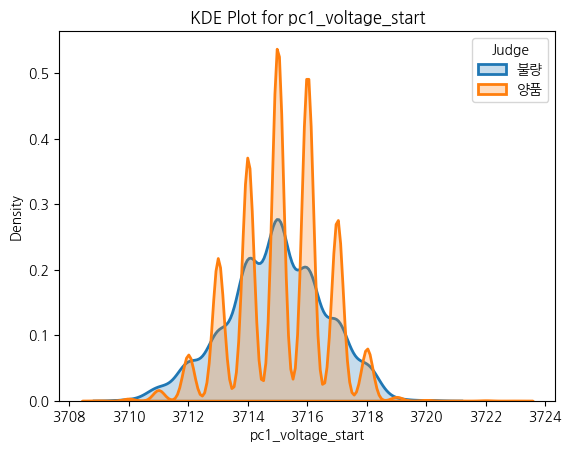

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


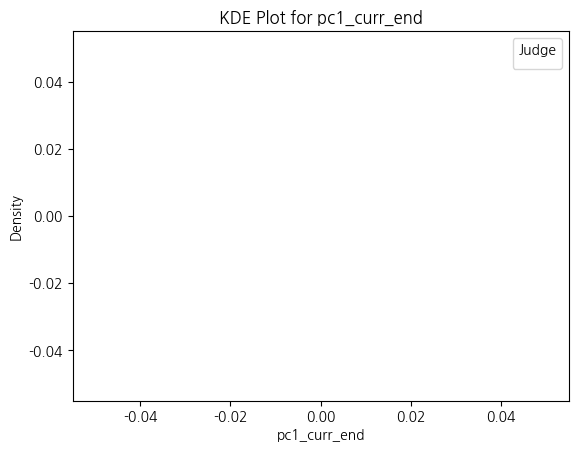

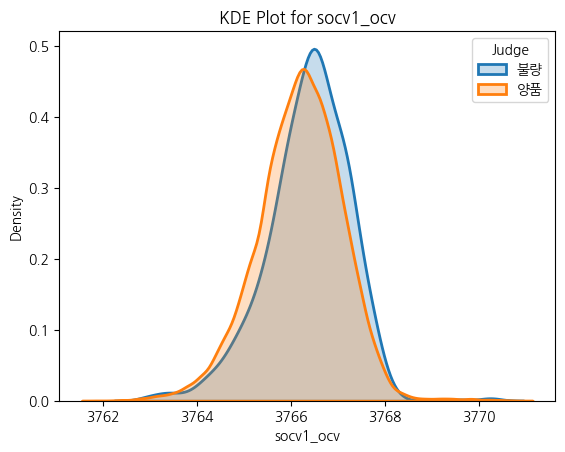

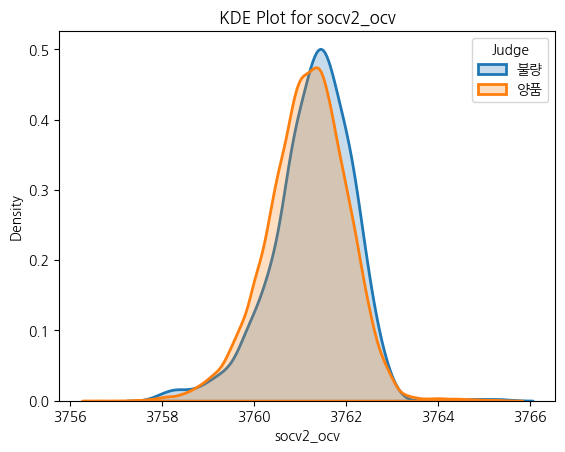

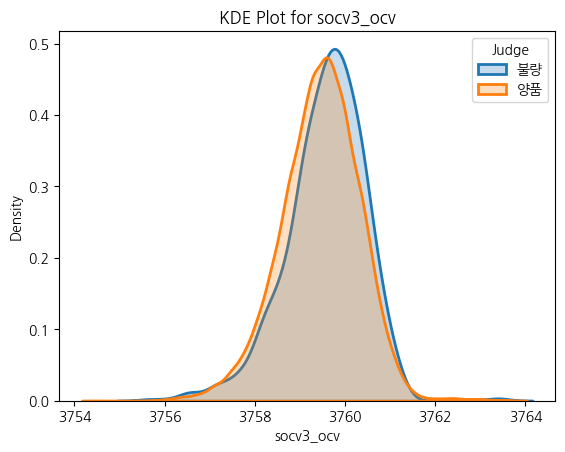

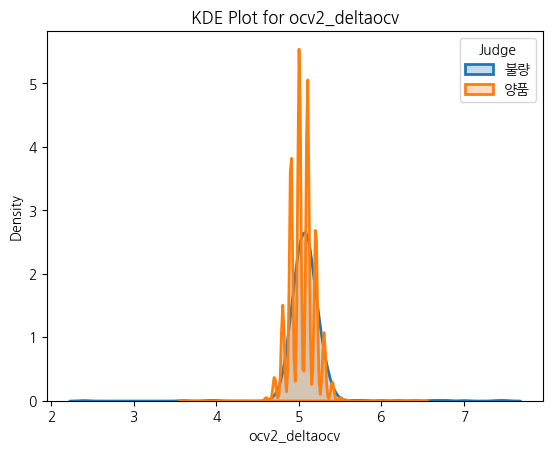

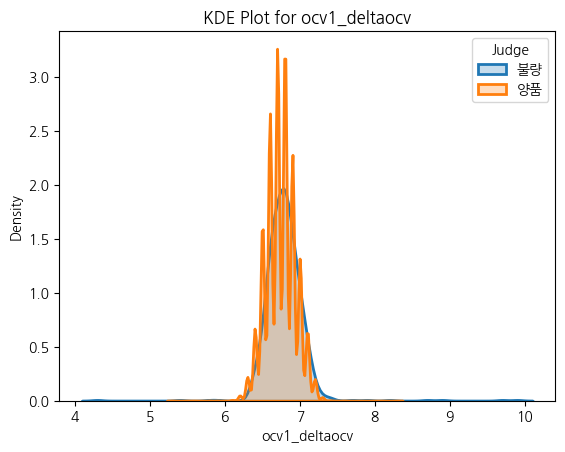

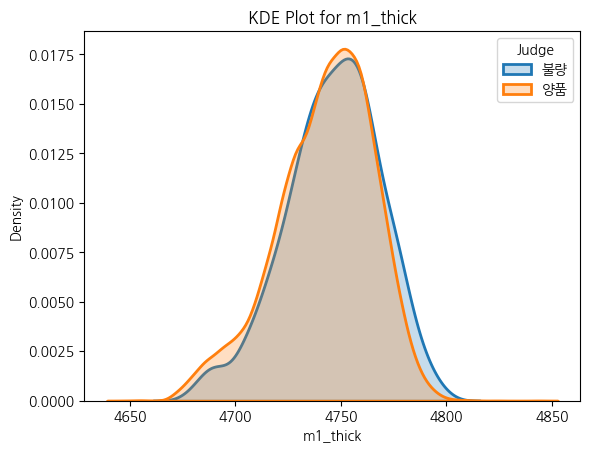

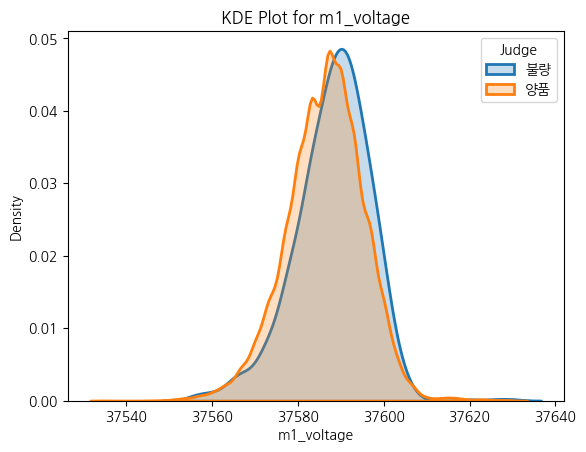

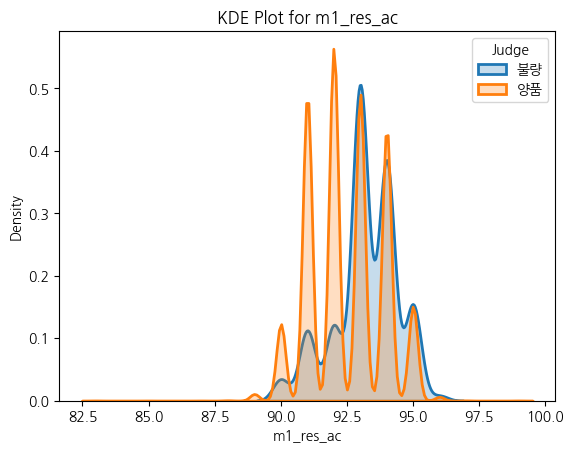

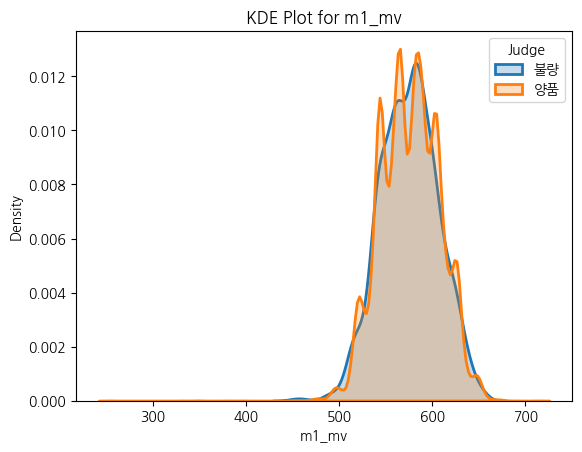

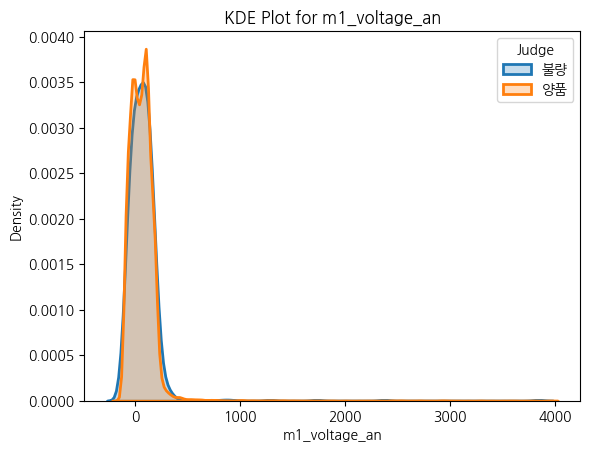

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


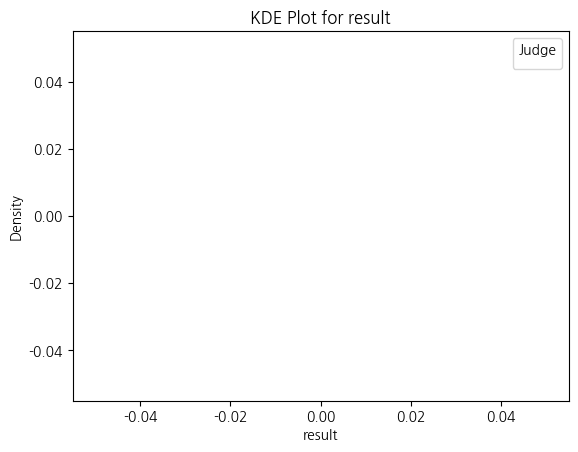

In [13]:
num_cols = df.select_dtypes(exclude = "object")

for i in num_cols:
    plt.figure()  # 새로운 그래프 창 열기
    for judge, data in df.groupby('judge'):
        sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
    plt.title(f"KDE Plot for {i}")  # 그래프 제목 설정
    plt.xlabel(i)  # x축 레이블 설정
    plt.ylabel('Density')  # y축 레이블 설정
    plt.legend(title='Judge')  # 범례 표시
    plt.show()

In [16]:
# 상관 행렬 계산
correlation_matrix = df.corr()

# ocv1_ocv와 다른 변수 간의 상관 관계 추출
ocv_correlation = correlation_matrix['ocv1_ocv'].sort_values(ascending=False)

# 결과 출력
print(ocv_correlation)


ocv1_ocv        1.000000
c4_capa         0.530447
dc3_capafit     0.488086
dc3_capa        0.487142
c4_ccval        0.290200
                  ...   
c2_time_cc     -0.286775
c2_capa        -0.286890
c2_ccval       -0.286890
sa1_tat        -0.307870
pc1_curr_end         NaN
Name: ocv1_ocv, Length: 86, dtype: float64


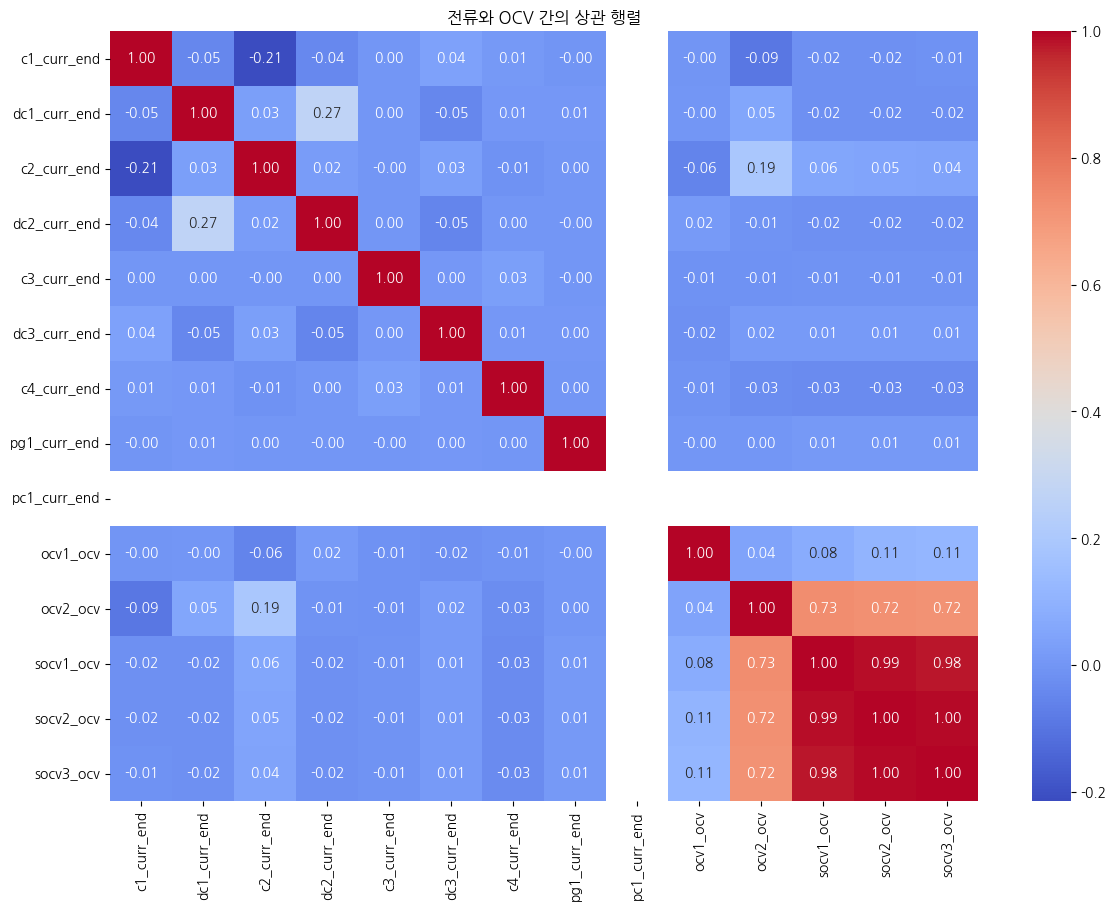

In [17]:
# 전류 및 OCV 관련 열 선택
current_columns = [
    'c1_curr_end', 'dc1_curr_end', 'c2_curr_end', 'dc2_curr_end', 
    'c3_curr_end', 'dc3_curr_end', 'c4_curr_end', 'pg1_curr_end', 'pc1_curr_end'
]
ocv_columns = ['ocv1_ocv', 'ocv2_ocv', 'socv1_ocv', 'socv2_ocv', 'socv3_ocv']

# 전류와 OCV 열 간의 상관 행렬 계산
correlation_matrix_current_ocv = df[current_columns + ocv_columns].corr()

# 상관 행렬 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_current_ocv, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('전류와 OCV 간의 상관 행렬')
plt.show()


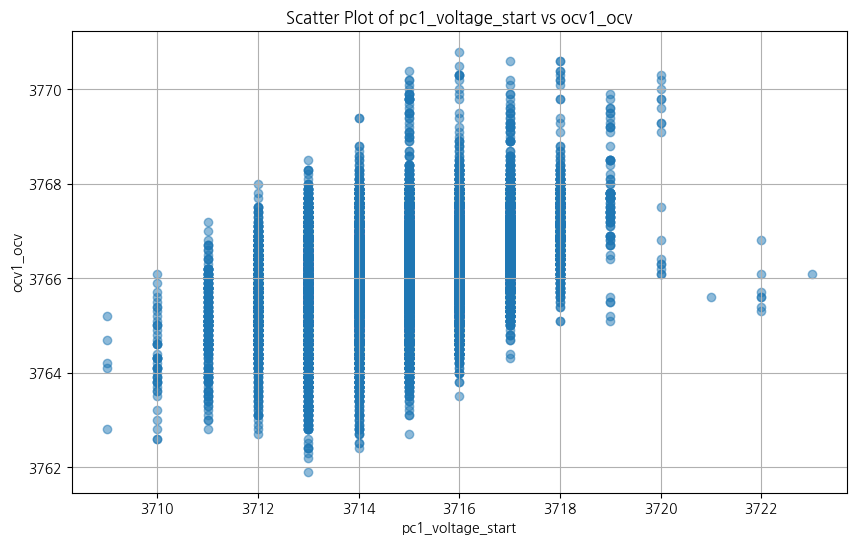

In [29]:
# c4_capa와 ocv1_ocv 간의 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df['pc1_voltage_start'], df['socv1_ocv'], alpha=0.5)
plt.title('Scatter Plot of pc1_voltage_start vs ocv1_ocv')
plt.xlabel('pc1_voltage_start')
plt.ylabel('ocv1_ocv')
plt.grid(True)
plt.show()

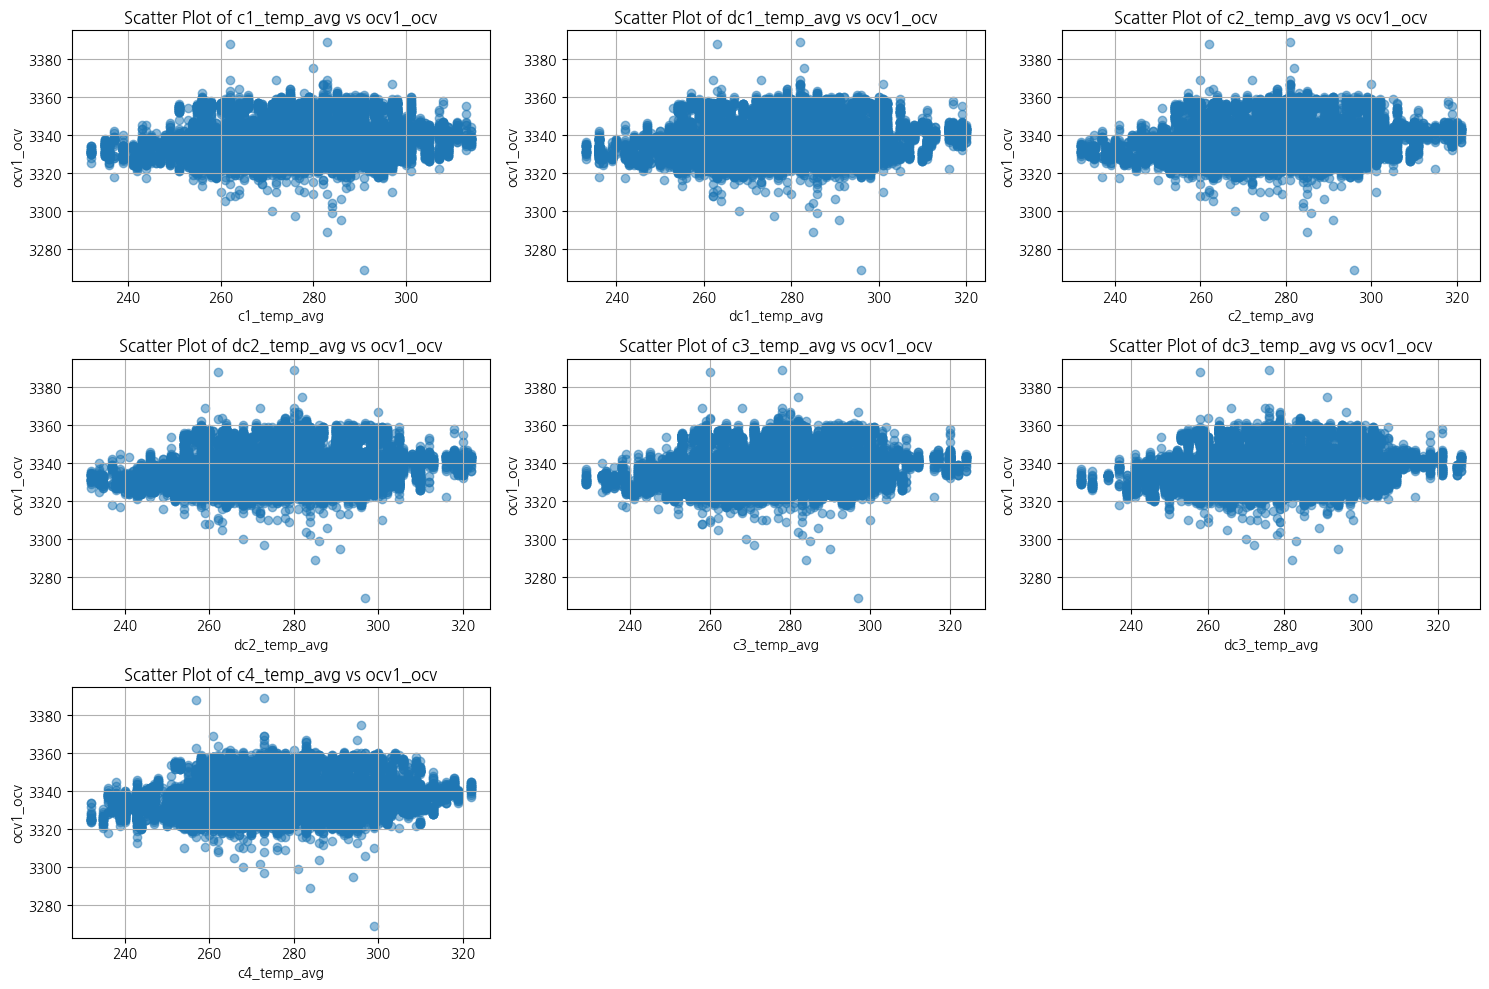

In [28]:
# 온도 관련 변수 리스트
temperature_columns = ['c1_temp_avg', 'dc1_temp_avg', 'c2_temp_avg', 'dc2_temp_avg', 'c3_temp_avg', 'dc3_temp_avg', 'c4_temp_avg']

# 산점도 그래프 그리기
plt.figure(figsize=(15, 10))
for i, col in enumerate(temperature_columns, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[col], df['ocv1_ocv'], alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs ocv1_ocv')
    plt.xlabel(col)
    plt.ylabel('ocv1_ocv')
    plt.grid(True)

plt.tight_layout()
plt.show()